In [19]:
import matplotlib.pyplot as plt
import numpy as np

# We'll use Sklearn just for create an artificial data set
# We'll build the model from the beggining

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [20]:
# let's create the data with 100 data and 1 feature
X, y = make_regression(n_samples = 100, n_features = 1, noise = 15, random_state = 42)

In [21]:
y = y.reshape(-1,1)
X = X.reshape(-1,1)

In [22]:
# Split the data as train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=42)

In [44]:
class LinearRegressionNumPy:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        self.w = None
        self.b = None

        self.cost_history = []
        
    def fit(self, X, y):
        # m = sample size, n = number of features
        m, n = X.shape
        
        # 1. PARAMETRELERİ BAŞLATMA (w ve b)
        self.w = np.zeros((n, 1))
        self.b = 0
        
        # 2. GRADYAN İNİŞİ DÖNGÜSÜ
        for i in range(self.n_iterations):
            
            # 3. HİPOTEZİ HESAPLAMA (Tahmin): ŷ = wX + b
            y_predicted = X @ self.w + self.b
            
            # 4. HATAYI HESAPLAMA (Fark): (ŷ - y)
            error = y_predicted - y
            
            # 5. GRADYANLARI HESAPLAMA (Türevler)
            dw = (1 / m) * (X.T @ error) 
            db = (1 / m) * np.sum(error)
            
            # 6. PARAMETRELERİ GÜNCELLEME (Öğrenme)
            self.w = self.w - self.learning_rate * dw
            # YAZIM HATASI DÜZELTİLDİ: 'seşf.b' yerine 'self.b'
            self.b = self.b - self.learning_rate * db
            
            # 7. MALİYETİ KAYDETME
            cost = (1 / (2 * m)) * np.sum(error**2)
            self.cost_history.append(cost)
            
            # F-STRING HATASI DÜZELTİLDİ
            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost:.4f}")
        
        # GERİ DÖNÜŞ SATIRI DÜZELTİLDİ: METOT İÇİNE GİRİNTİLENDİ
        return self
        
    def predict(self, X):
          y_predicted = X @ self.w + self.b
          return y_predicted

In [46]:
model = LinearRegressionNumPy(learning_rate = 0.01, n_iterations=1500)

print("model eğitimi başlıyor")
model.fit(X_train, y_train)
print("Model eğitimi tamamlandı")

print("\nEğitimden sonraki nihai parametreler")
print(f"Ağırlık (w): {model.w[0][0]:.4f}")
print(f"Bias (b): {model.b:.4f}")

model eğitimi başlıyor
Iteration 0: Cost = 944.6693
Iteration 100: Cost = 243.1076
Iteration 200: Cost = 113.8697
Iteration 300: Cost = 88.5646
Iteration 400: Cost = 83.4060
Iteration 500: Cost = 82.3283
Iteration 600: Cost = 82.0999
Iteration 700: Cost = 82.0512
Iteration 800: Cost = 82.0407
Iteration 900: Cost = 82.0385
Iteration 1000: Cost = 82.0380
Iteration 1100: Cost = 82.0379
Iteration 1200: Cost = 82.0379
Iteration 1300: Cost = 82.0378
Iteration 1400: Cost = 82.0378
Model eğitimi tamamlandı

Eğitimden sonraki nihai parametreler
Ağırlık (w): 45.4954
Bias (b): 0.1486


In [47]:
y_test_predicted = model.predict(X_test)

mse_test = np.mean((y_test_predicted - y_test )**2)
print(f"\nTest seti MSE (Ortalama Karesel Hata): {mse_test:.4f}")


Test seti MSE (Ortalama Karesel Hata): 234.4583


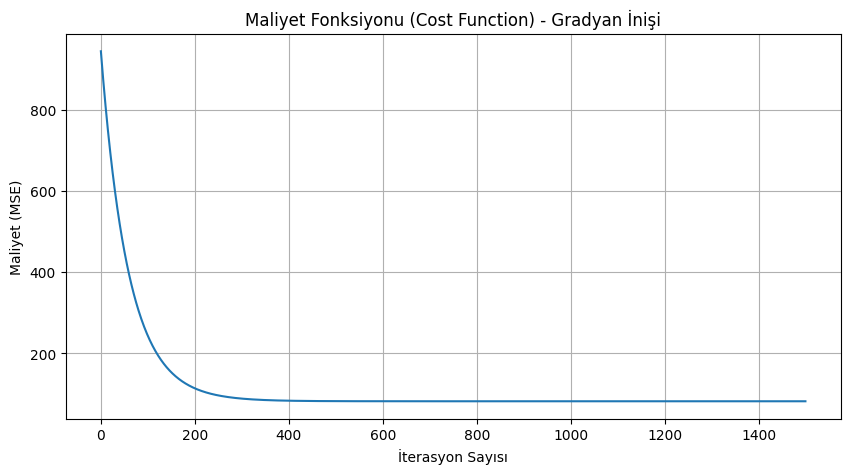

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(model.cost_history)
plt.title('Maliyet Fonksiyonu (Cost Function) - Gradyan İnişi')
plt.xlabel('İterasyon Sayısı')
plt.ylabel('Maliyet (MSE)')
plt.grid(True)
plt.show()

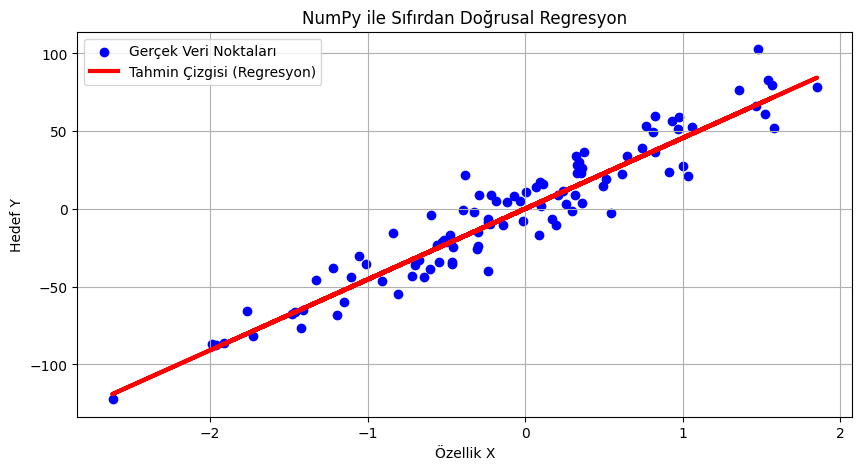

In [49]:
plt.figure(figsize=(10, 5))
# Gerçek veriyi dağılım grafiği (scatter plot) olarak çiz
plt.scatter(X, y, color='blue', label='Gerçek Veri Noktaları')

# Eğitilmiş modelin tahmin çizgisini çiz
y_final_predicted = model.predict(X)
plt.plot(X, y_final_predicted, color='red', linewidth=3, label='Tahmin Çizgisi (Regresyon)')

plt.title('NumPy ile Sıfırdan Doğrusal Regresyon')
plt.xlabel('Özellik X')
plt.ylabel('Hedef Y')
plt.legend()
plt.grid(True)
plt.show()